# Implementation of agglomarative clustering with scikit-learn

# importing the neccessary library

In [1]:
#importing the neccessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the dataset 

In [2]:
data =pd.read_csv('credit_card.csv')# Reading or importing the dataset 

In [3]:
data.head(5)# Shows the first five rows with all columns of our dataset

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [25]:
data.shape

(8950, 17)

# removing unwanted feature from the dataset

In [4]:
data = data.drop('CUST_ID', axis = 1) # removing "CUST_ID" feature from the columns

In [5]:
data.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Dealing with missing values

In [6]:
data.isnull().values.any()# cheacking whether there is a missing value or not in our dataset as a whole

True

In [7]:
data.isnull().sum()#To cheack in which of the feature has a missing value

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
data.fillna(method ='ffill',axis=0, inplace = True) #Forward-fill 

In [26]:
data.isnull().values.any()# cheacking whether there is a missing value or not in our dataset as a whole

False

# Normalizing the dataset

In [10]:
from sklearn.preprocessing import normalize #To make the scale of each variable is the same.
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)# Changing to dataframe type 
data_scaled.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.039353,0.000787,0.091790,0.000000,0.09179,0.000000,0.000160,0.000000,0.00008,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.00000,0.011546
1,0.293876,0.000083,0.000000,0.000000,0.00000,0.591240,0.000000,0.000000,0.00000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.00002,0.001101
2,0.310798,0.000125,0.096307,0.096307,0.00000,0.000000,0.000125,0.000125,0.00000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.00000,0.001495
3,0.208403,0.000080,0.187437,0.187437,0.00000,0.025732,0.000010,0.000010,0.00000,0.000010,0.000125,0.000125,0.937809,0.000000,0.078436,0.00000,0.001500
4,0.504284,0.000617,0.009867,0.009867,0.00000,0.000000,0.000051,0.000051,0.00000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.00000,0.007400


# Applying PCA

In [27]:
from sklearn.decomposition import PCA # To reduce the dimension of the data
pca = PCA(n_components = 2)# To reduce the data dimension into two components
data_reduced = pca.fit_transform(data_scaled)
data_reduced = pd.DataFrame(data_reduced)# changing the data type to DataFrame
data_reduced.columns = ['P1', 'P2']# assigning tha name of the columns as "P1",and "P2"

In [28]:
data_reduced.head(5)

,P1,P2
0,-0.315576,-0.044823
1,0.317328,-0.156866
2,-0.206978,-0.183004
3,-0.279409,-0.118059
4,0.140988,-0.090323


# Ploting the dendogram

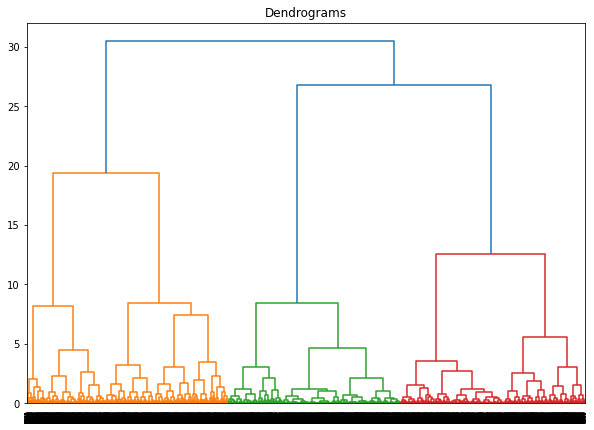

In [13]:
import scipy.cluster.hierarchy as hc # used us to Plot the hierarchical clustering as a dendrogram
plt.figure(figsize=(10, 7))# Width, height in inches.
plt.title("Dendrograms")  # the title of the diagram
dendo=hc.dendrogram(hc.linkage(data_reduced, method='ward'))

# Applying Agglomarative clustering

In [29]:
from sklearn.cluster import AgglomerativeClustering # importing AgglomerativeClustering algorithm functions
Ag_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')# number of cluster= 3
                                                          #Distance measure method='euclidean' and linkage method = 'ward'
y_pred= Ag_cluster.fit_predict(data_reduced) #estimates the best representative function for the the data points
                                             


In [30]:
y_pred #looking the clusters

array([2, 0, 1, ..., 2, 2, 0], dtype=int64)

In [31]:
y=pd.DataFrame(y_pred) #changing the array 'y_pred' cluster into DataFrame and assigned into 'y'

In [32]:
y

,0
0,2
1,0
2,1
3,1
4,0
...,...
8945,2
8946,2
8947,2
8948,2


# counting the total number of instances in each clusters

In [33]:
print("the total number of each of the assigned points in each cluster is: ")
print("For cluster two" , y[y==2].value_counts())
print("For cluster one" , y[y==1].value_counts())
print("For cluster zeros" , y[y==0].value_counts())

the total number of each of the assigned points in each cluster is: 
For cluster two 2.0    2769
dtype: int64
For cluster one 1.0    2950
dtype: int64
For cluster zeros 0.0    3231
dtype: int64


# Scatter ploting the clusters

Text(0.5, 1.0, 'Clusters of  reduced data')

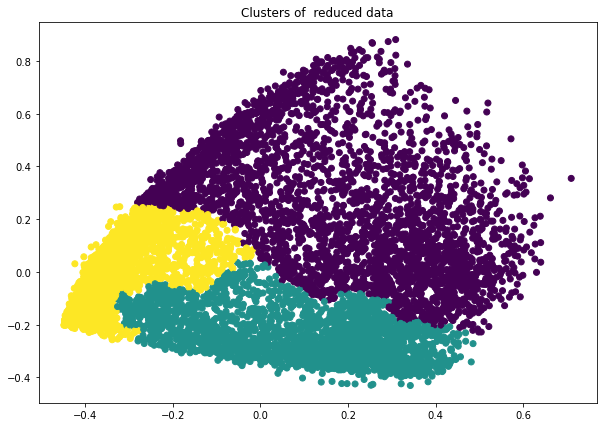

In [34]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_reduced['P1'], data_reduced['P2'], c=Ag_cluster.labels_) # c= list of colors 
plt.title('Clusters of  reduced data')  


# With out Applying PCA

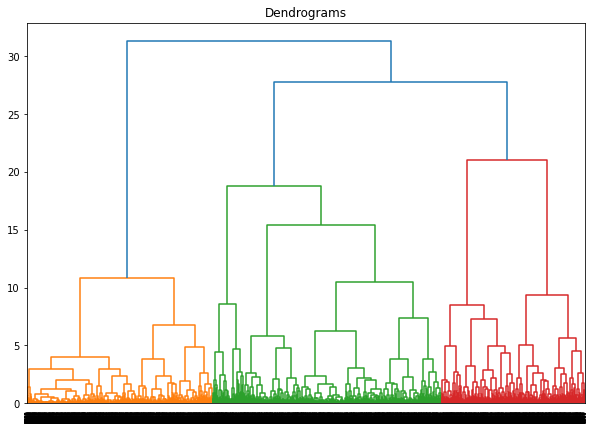

In [21]:
import scipy.cluster.hierarchy as hc # used us to Plot the hierarchical clustering as a dendrogram
plt.figure(figsize=(10, 7))# Width, height in inches.
plt.title("Dendrograms")  # the title of the diagram
dend = hc.dendrogram(hc.linkage(data_scaled, method='ward'))

In [22]:
from sklearn.cluster import AgglomerativeClustering # importing AgglomerativeClustering algorithm functions
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')# number of cluster= 3
#Distance measure method='euclidean' and linkage method = 'ward'
cluster.fit_predict(data_scaled) 

array([1, 0, 2, ..., 1, 1, 0], dtype=int64)

In [23]:
data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.039353,0.000787,0.091790,0.000000,0.09179,0.000000,0.000160,0.000000,0.00008,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.00000,0.011546
1,0.293876,0.000083,0.000000,0.000000,0.00000,0.591240,0.000000,0.000000,0.00000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.00002,0.001101
2,0.310798,0.000125,0.096307,0.096307,0.00000,0.000000,0.000125,0.000125,0.00000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.00000,0.001495
3,0.208403,0.000080,0.187437,0.187437,0.00000,0.025732,0.000010,0.000010,0.00000,0.000010,0.000125,0.000125,0.937809,0.000000,0.078436,0.00000,0.001500
4,0.504284,0.000617,0.009867,0.009867,0.00000,0.000000,0.000051,0.000051,0.00000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.00000,0.007400


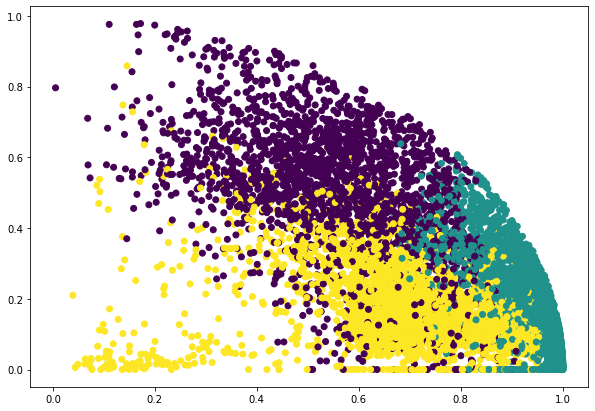

In [24]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['CREDIT_LIMIT'], data_scaled['PAYMENTS'], c=cluster.labels_) 